In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../data/raw/uci-news-aggregator.csv', index_col='ID')

In [6]:
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
ID,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [26]:
len(data.index)

422419

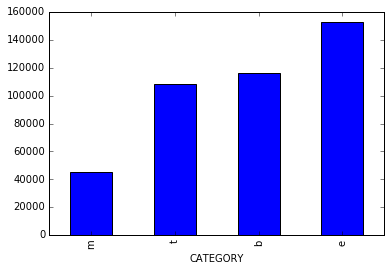

In [30]:
# Breakdown of story categories
data.groupby('CATEGORY').size().sort_values().plot(kind='bar')

Populating the interactive namespace from numpy and matplotlib


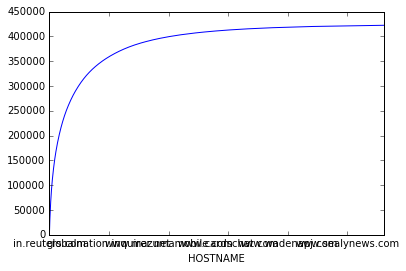

In [129]:
# Pareto analysis of websites
%pylab inline

data.groupby('HOSTNAME').size().sort_values(ascending=False).cumsum().plot()

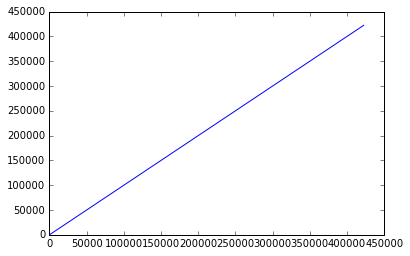

In [123]:

plt.plot(np.arange(0, n, 1), np.arange(0, n, 1))


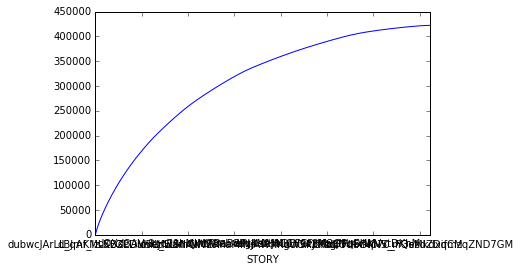

In [45]:
# How many headlines per story
data.groupby('STORY').size().sort_values(ascending=False).cumsum().plot()

In [85]:
# How many times were there duplicated headlines?
unique_counts = data.groupby('STORY')['TITLE'].agg([np.size, pd.Series.nunique])
len(unique_counts.ix[np.where(unique_counts['size'] != unique_counts['nunique'])])

129

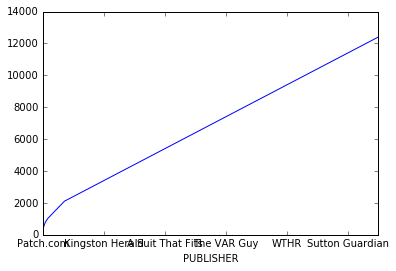

In [92]:
# Publishers using many domains
data.groupby('PUBLISHER')['HOSTNAME'].nunique().sort_values(ascending=False).cumsum().plot()